# Price and Income Effects with CES Preferences

In [2]:
import numpy as np 
from matplotlib import pyplot as plt 


The utility function is : 
$$u(X,Y) = \left(X^{\rho} + Y^{\rho} \right)^{\tfrac{1}{\rho}} $$

Here are a few useful functions

In [3]:
def u(x,y,rho):
    sub = (x**rho) + (y**rho)
    return sub**(1/rho)
def mu_x(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(x**(rho-1.0))
def mu_y(x,y,rho):
    sub = (x**rho) + (y**rho)
    return (1/rho)*(sub**(1/rho-1))*rho*(y**(rho-1.0))
def tms(x,y,rho):
    return - (x/y)**(rho-1.0)
def indf(v,x,rho):
    return (v**rho - x**rho)**(1/rho)


Find the demand functions from:   $|TMS| = \tfrac{p_X}{p_Y}$. Therefore, 

$$ \frac{X}{Y} = \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}} $$

Using the budget constraint :

$$ p_X \left(\frac{p_X}{p_Y}\right)^{\tfrac{1}{\rho-1}}Y + p_Y Y = I $$

So, denoting $r = \frac{\rho}{\rho-1}$ we get: 

$$ \left(p_X^r p_Y^{1-r} + p_Y \right) Y = I $$



$$ Y^* = \frac{p_Y^{r-1}}{ p_X^r + p_Y^r }I $$

and


$$ X^* = \frac{p_X^{r-1}}{ p_X^r + p_Y^r }I $$

Program these functions to ultimately compute indirect utility. 


In [4]:
def xstar(px,py,I,rho):
  r = rho/(rho-1)
  return (px**(r-1)/(px**r + py**r))*I 
def ystar(px,py,I,rho):
  r = rho/(rho-1)
  return (py**(r-1)/(px**r + py**r))*I 
def vstar(px,py,I,rho):
  x = xstar(px,py,I,rho)
  y = ystar(px,py,I,rho)
  return u(x,y,rho)


Now fix parameters (we can change them later)

In [5]:
px = 1
py = 1
I = 100
px_hat = 2
rho = 0.5

Find demands at reference prices

In [6]:
xref,yref = xstar(px,py,I,rho),ystar(px,py,I,rho)

And utility at reference prices

In [7]:
vref = vstar(px,py,I,rho)

Do the same at new prices

In [8]:
xhat,yhat = xstar(px_hat,py,I,rho),ystar(px_hat,py,I,rho)

In [9]:
vhat = vstar(px_hat,py,I,rho)

Consider for different income levels, indirect utility at the new prices. This gives us an idea of the compensation required to maintain utility at reference level. 

In [10]:
Is = np.linspace(50,200,100)

In [11]:
vhats = [vstar(px_hat,py,i,rho) for i in Is]

Do a graphic. Somewhere between 120 and 140 we have compensated income


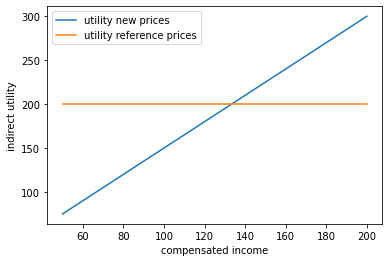

In [12]:
plt.figure()
plt.plot(Is,vhats,label='utility new prices')
plt.plot(Is,vref*np.ones(100),label='utility reference prices')
plt.xlabel('compensated income')
plt.ylabel('indirect utility')
plt.legend()
plt.show()

To find an exact solution, without using the analytical solution, we can define a function that gives the difference in utility for a given level of compensation. 

In [13]:
def slack(cmp,px,dpx,py,I,rho):
    return vstar(px,py,I,rho) - vstar(px+dpx,py,I+cmp,rho)

We then find the zero of that function in terms of the compensation (cmp). 

In [14]:
from scipy.optimize import bisect

In [15]:
bisect(slack,0,I,args=(px,px_hat-px,py,I,rho))

33.33333333333286

We find a compensation of 33.33. Now, do this for different changes in prices. This gives us compensations as a function of price changes.  

In [16]:
dpxs = np.linspace(-0.5,1,100)
cmps = [bisect(slack,-I,I,args=(px,dpx,py,I,rho)) for dpx in dpxs]
cmp_approx = dpxs * xstar(px,py,I,rho)

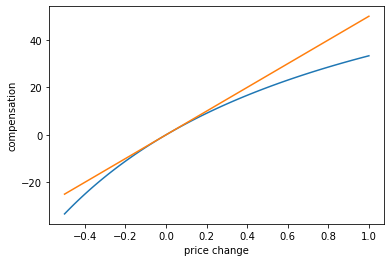

In [17]:
plt.figure()
plt.plot(dpxs,cmps,label='exact')
plt.plot(dpxs,cmp_approx,label='approximation')
plt.xlabel('price change')
plt.ylabel('compensation')
plt.show()

Now let's have fun (!) plotting a optimal choice solution for a given change in prices. Start with the reference scenario. 

In [18]:
xs = np.linspace(0,I/px)
budget_ref = I/py - px/py * xs

Add the indifference curve with utility in the reference scenario. 

In [19]:
udif_ref = indf(vref,xs,rho)

Now with new prices. 

In [20]:
budget_hat = I/py - px_hat/py * xs
udif_hat = indf(vhat,xs,rho)

The compensated situation

In [21]:
Icmp = I + bisect(slack,0,I,args=(px,px_hat-px,py,I,rho))

In [22]:
xcmp = xstar(px_hat,py,Icmp,rho)
ycmp = ystar(px_hat,py,Icmp,rho)
vcmp = vstar(px_hat,py,Icmp,rho)
xcmp,ycmp,vcmp,vref

(22.222222222222143, 88.88888888888857, 199.99999999999926, 200.00000000000003)

In [23]:
budget_cmp = Icmp/py - px_hat/py*xs
udif_cmp = indf(vcmp,xs,rho)

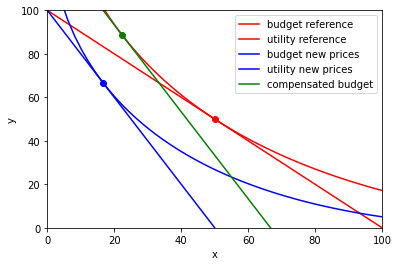

In [24]:
plt.figure()
plt.plot(xs,budget_ref,label='budget reference',color='r')
plt.plot(xs,udif_ref,label='utility reference',color='r')
plt.scatter(xref,yref,color='r')
plt.plot(xs,budget_hat,label='budget new prices',color='b')
plt.plot(xs,udif_hat,label='utility new prices',color='b')
plt.scatter(xhat,yhat,color='b')
plt.plot(xs,budget_cmp,label='compensated budget',color='g')
plt.scatter(xcmp,ycmp,color='g')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([0, I/py])
plt.xlim([0, I/px])
plt.show()

Put this in a function to avoid re-doing time and time again. 

In [25]:
def equigraph(px,py,I,dpx,rho):
    xs = np.linspace(0,I/px)
    budget_ref = I/py - px/py * xs
    xref, yref = xstar(px,py,I,rho), ystar(px,py,I,rho)
    vref = vstar(px,py,I,rho)
    udif_ref = indf(vref,xs,rho)
    px_hat = px + dpx
    budget_hat = I/py - px_hat/py * xs
    xhat, yhat = xstar(px_hat,py,I,rho), ystar(px_hat,py,I,rho)
    vhat = vstar(px_hat,py,I,rho)
    udif_hat = indf(vhat,xs,rho)
    Icmp = I + bisect(slack,-I,I,args=(px,dpx,py,I,rho))
    xcmp, ycmp = xstar(px_hat,py,Icmp,rho), ystar(px_hat,py,Icmp,rho)
    vcmp = vstar(px_hat,py,Icmp,rho)
    budget_cmp = Icmp/py - px_hat/py*xs
    plt.figure()
    plt.plot(xs,budget_ref,label='budget reference',color='r')
    plt.plot(xs,udif_ref,label='utility reference',color='r')
    plt.scatter(xref,yref,color='r')
    plt.plot(xs,budget_hat,label='budget new prices',color='b')
    plt.plot(xs,udif_hat,label='utility new prices',color='b')
    plt.scatter(xhat,yhat,color='b')
    plt.plot(xs,budget_cmp,label='budget compensated',color='g')
    plt.scatter(xcmp,ycmp,color='g')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim([0, I/py])
    plt.xlim([0, I/px])
    plt.show()
    return 

Price decrease... 

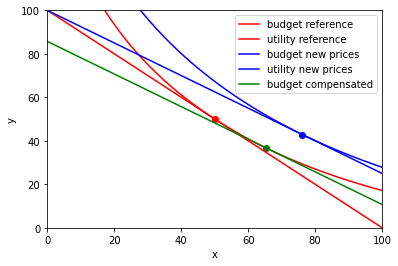

In [26]:
equigraph(1,1,100,-0.25,rho)

A smaller rho

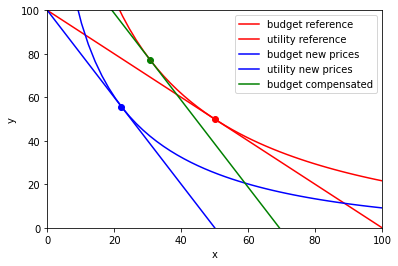

In [27]:
equigraph(1,1,100,1.0,0.25)